In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_edep(path):
    return np.loadtxt(path)

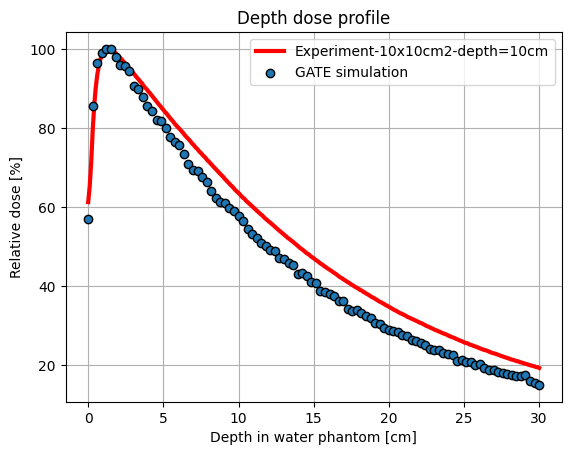

In [3]:
# set number of files
nfiles = 100

# Depth dose profile plot
edep = []
for i in range(1, nfiles+1):
    edep_tmp = load_edep(r"results/QA/4x4cm2/depth-dose{}-Edep.txt".format(i))
    edep.append(edep_tmp)
   
edep_sum = [0]*100
for i in range(len(edep)):
    edep_sum = edep_sum + edep[i]

# Read experiment data
depth_dose_ex_file = open(r"varian/DD-10x10cm2.txt",'r')
depth_dose_ex_lines = depth_dose_ex_file.readlines()
depth_dose_ex_data = []

for line in depth_dose_ex_lines:
    depth_dose_ex_data.append(float(line))
depth_dose_ex_data = np.array(depth_dose_ex_data)
  
n = len(edep_sum)
x = np.linspace(0, 30, n)
y = edep_sum
y = np.flip(y)
y = 100*y/y.max()

n2 = len(depth_dose_ex_data)
x2 = np.linspace(0, 30, n2)
y2 = depth_dose_ex_data

plt.plot(x2, y2, label="Experiment-10x10cm2-depth=10cm", color='red', linewidth=3)
plt.scatter(x, y, label="GATE simulation", zorder=2, facecolor='C0', edgecolor='k')

plt.plot()
plt.grid(True)
plt.title("Depth dose profile")
plt.xlabel("Depth in water phantom [cm]")
plt.ylabel("Relative dose [%]")
plt.legend(loc="upper right")
plt.savefig("DepthDose.png", dpi=300)
plt.show()

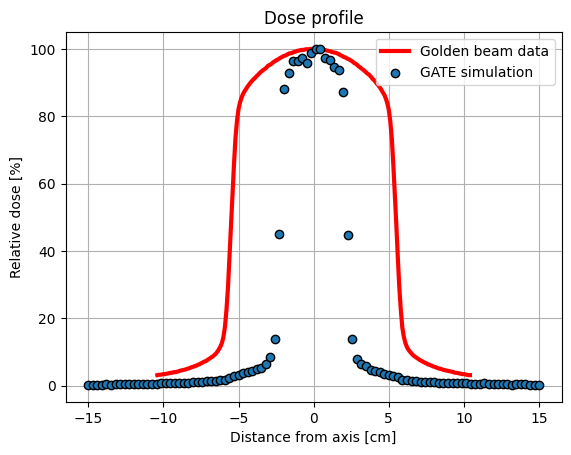

In [7]:
# Dose profile plot
edep = []
for i in range(1, nfiles+1):
    edep_tmp = load_edep(r"results/QA/4x4cm2/dose-profile{}-Edep.txt".format(i))
    edep.append(edep_tmp)
   
edep_sum = [0]*100
for i in range(len(edep)):
    edep_sum = edep_sum + edep[i]

# read FFF experiment data
exFile = open("varian/DP-10x10cm^2", 'r')
exdat = exFile.readlines()
exData = []

for line in exdat:
    tmp = line.split()
    exData.append(float(tmp[0]))    
    
n = len(edep_sum)
x = np.linspace(-15, 15, n)
y = edep_sum
y = np.flip(y)
y = 100*y/y.max()


n2 = len(exData)
x2 = np.linspace(-10.4, 10.4, n2)
y2 = exData
plt.plot(x2, y2, label="Golden beam data", color='red', linewidth=3)
plt.scatter(x, y, label="GATE simulation", zorder=2, facecolor='C0', edgecolor='k')
plt.grid(True)
plt.title("Dose profile")
plt.xlabel("Distance from axis [cm]")
plt.ylabel("Relative dose [%]")
plt.legend(loc="upper right")
plt.savefig("DoseProfile.png", dpi=300)
plt.show()